In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import os
os.sys.path
import random
import cv2
import tensorflow as tf
import pathlib
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras

In [34]:
labels = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
translated_labels = ["dog", "horse", "elephant", "butterfly", "chicken", "cat", "cow", "sheep", "spider", "squirrel"]

In [35]:
len(tf.config.list_physical_devices('GPU'))

1

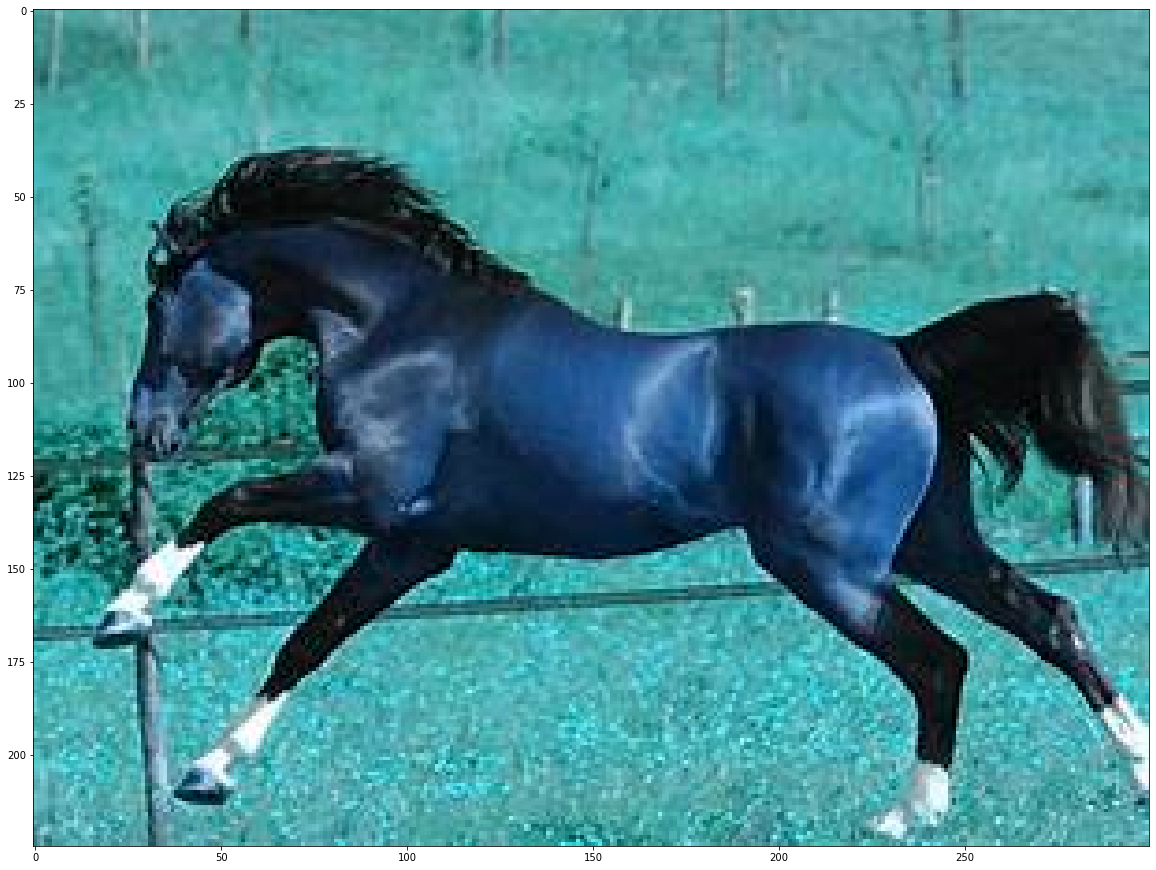

In [36]:
# displaying an image for the label if existent than display an image
directory='C:/Users/Jacob Sunia/Desktop/archive/raw-img'
for i in range(1, len(labels)):
    path = os.path.join(directory, labels[i])
    for img in os.listdir(path):
        image = cv2.imread(os.path.join(path, img))
        plt.imshow(image)
        break
    break


In [37]:
#Get number of images in dataset
data_dir = pathlib.Path("C:/Users/Jacob Sunia/Desktop/archive/raw-img")
image_count = len(list(data_dir.glob('*/*')))

#Constants
#Size of image in AlexNet Model
IMAGE_HEIGHT = 128           
IMAGE_WIDTH = 128

BATCH_SIZE = 32

#Number of animals in dataset
output_class_units = 10

#Obtain all images to be used as data from dataset includes preprocessing
all_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory="C:/Users/Jacob Sunia/Desktop/archive/raw-img",
    image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    labels='inferred')

size = len(all_data)

#Training: 80%, Validation: 10%, Testing: 10%
training_size = int(.8 * size)
validation_size = int(.1 * size)

training_data = all_data.take(training_size)
validation_data = all_data.skip(training_size).take(validation_size)
testing_data = all_data.skip(training_size + validation_size).take(size - training_size - validation_size)


Found 26179 files belonging to 10 classes.


In [38]:
print(training_data)

<TakeDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>


In [154]:
model = Sequential()
model.add(Conv2D(input_shape=(128,128,3),filters=16,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(2,2), padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(2,2),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(4,4),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(4,4), padding="same", activation="relu"))
model.add(Conv2D(filters=512,kernel_size=(4,4),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(4,4),strides=(4,4)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(2,2), padding="same", activation="relu"))
model.add(Conv2D(filters=16,kernel_size=(2,2),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(output_class_units, activation="softmax"))

In [155]:
opt = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [156]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_231 (Conv2D)         (None, 128, 128, 16)      448       
                                                                 
 conv2d_232 (Conv2D)         (None, 128, 128, 16)      2320      
                                                                 
 conv2d_233 (Conv2D)         (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_188 (MaxPooli  (None, 64, 64, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_234 (Conv2D)         (None, 64, 64, 32)        4128      
                                                                 
 conv2d_235 (Conv2D)         (None, 64, 64, 64)        8256      
                                                     

In [157]:
history = model.fit(training_data, epochs=10, validation_data=validation_data)

model.save('Jacob VGG16')

Epoch 1/10
655/655 [==============================] - 64s 96ms/step - loss: 1.9675 - accuracy: 0.3106 - val_loss: 1.7474 - val_accuracy: 0.3908
Epoch 2/10
655/655 [==============================] - 63s 96ms/step - loss: 1.6896 - accuracy: 0.4009 - val_loss: 1.5316 - val_accuracy: 0.4664
Epoch 3/10
655/655 [==============================] - 63s 96ms/step - loss: 1.5369 - accuracy: 0.4516 - val_loss: 1.5395 - val_accuracy: 0.4587
Epoch 4/10
655/655 [==============================] - 63s 97ms/step - loss: 1.4447 - accuracy: 0.4948 - val_loss: 1.4183 - val_accuracy: 0.5131
Epoch 5/10
655/655 [==============================] - 63s 97ms/step - loss: 1.3406 - accuracy: 0.5309 - val_loss: 1.3784 - val_accuracy: 0.5266
Epoch 6/10
655/655 [==============================] - 63s 96ms/step - loss: 1.2839 - accuracy: 0.5545 - val_loss: 1.2665 - val_accuracy: 0.5660
Epoch 7/10
655/655 [==============================] - 63s 97ms/step - loss: 1.1952 - accuracy: 0.5873 - val_loss: 1.2222 - val_accuracy:

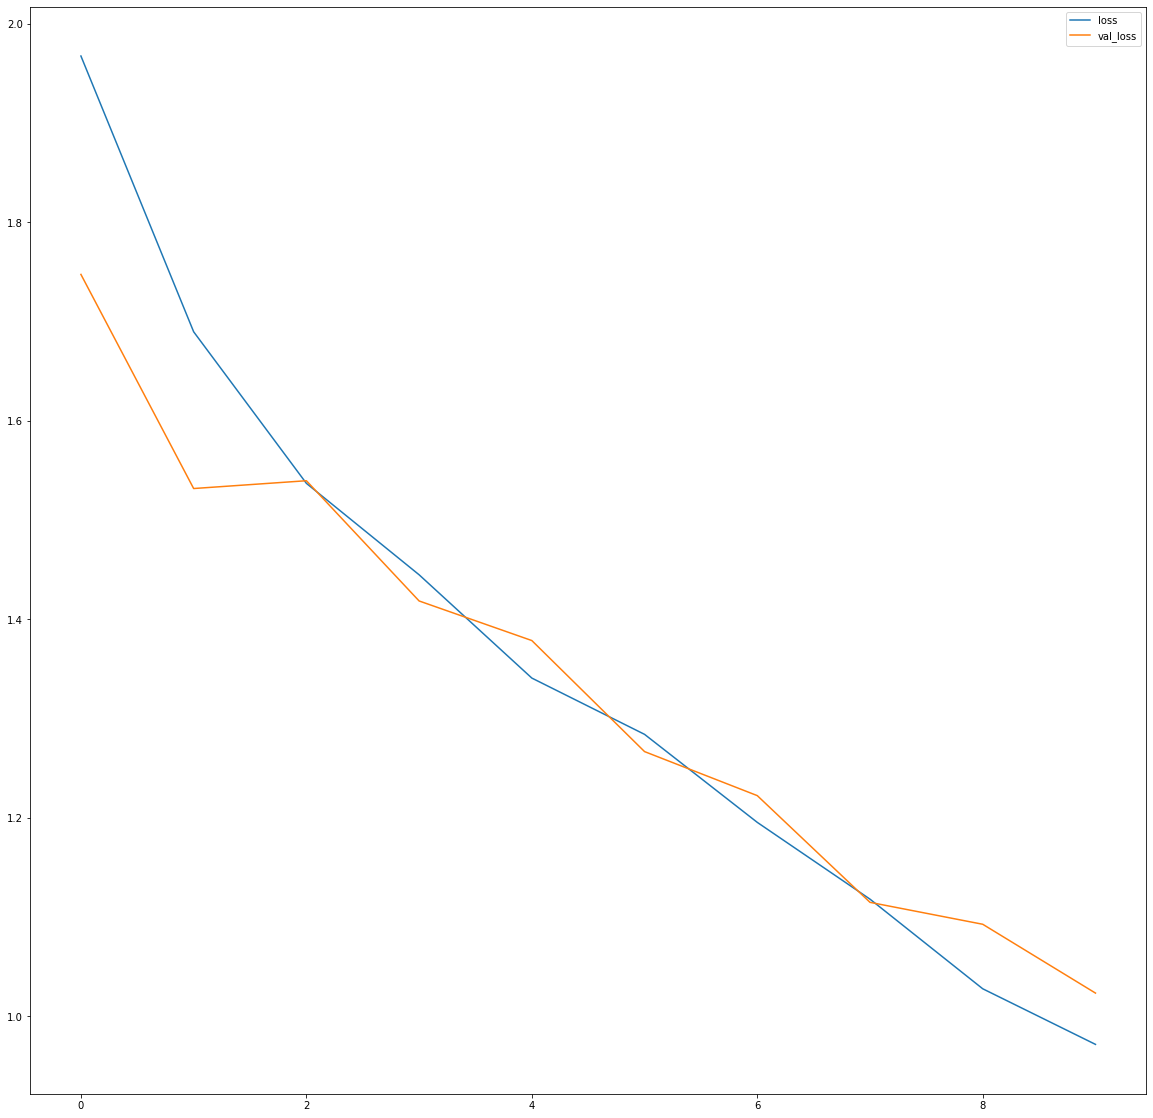

In [158]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [159]:
score = model.evaluate(testing_data)

83/83 [==============================] - 12s 35ms/step - loss: 1.0763 - accuracy: 0.6338


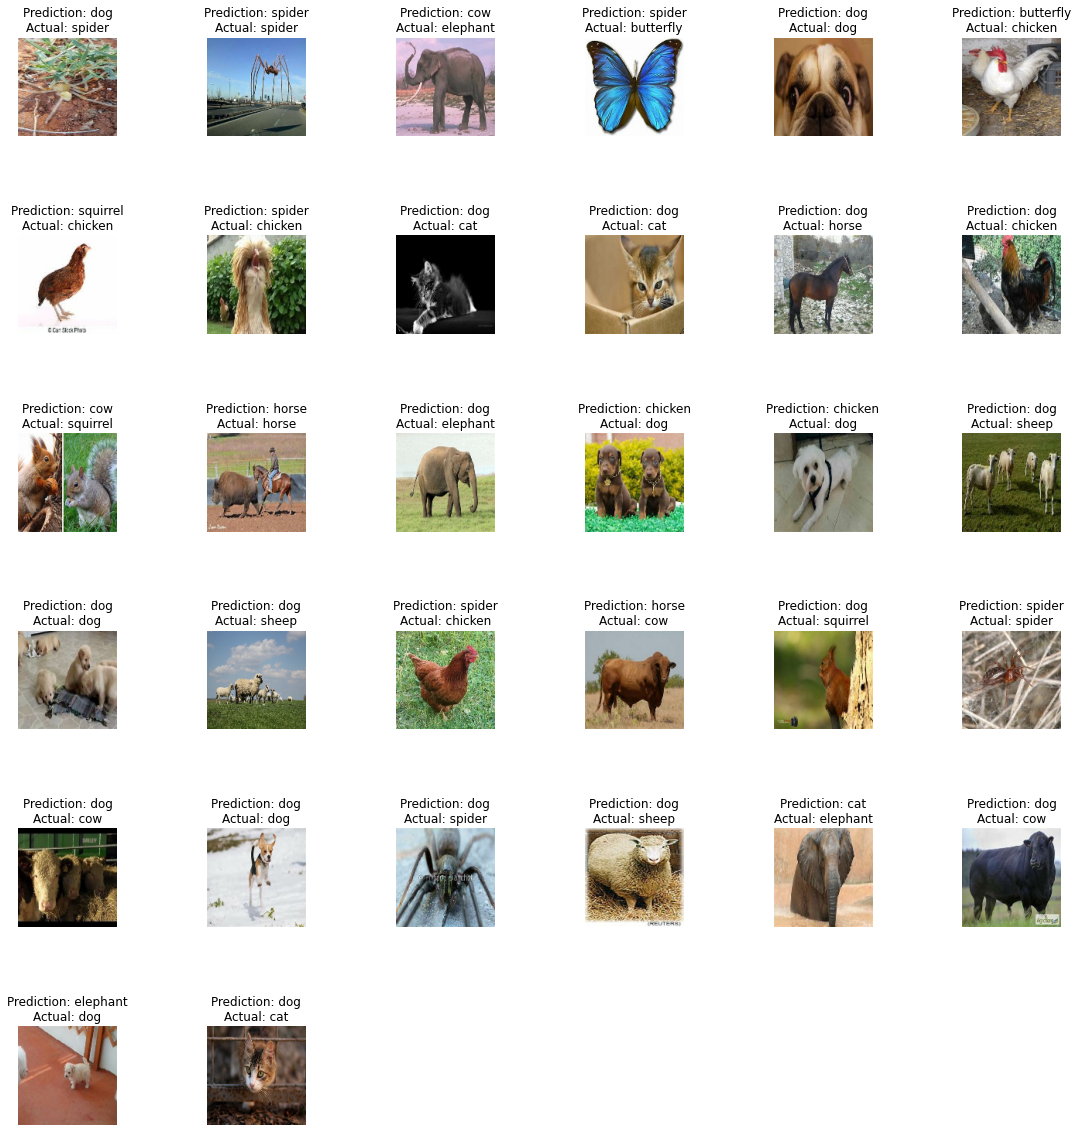

In [161]:
from math import sqrt
import random
translate = {"ragno": "spider", "cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}

# Make a prediction of random batch in testing data.
prediction_data = testing_data.skip(random.randint(0, len(testing_data) - 1)).take(1)
prediction = np.argmax(model.predict(prediction_data), axis=-1)

class_names = all_data.class_names

#Make Plot Big Enough For Testing Data pictures to be visible
plt.rcParams["figure.figsize"] = (20,20)
# Display prediction.
for images, labels in prediction_data:
    for i in range(BATCH_SIZE):
        actual = np.argmax(labels[i].numpy())
        ax = plt.subplot(int(sqrt(BATCH_SIZE)) + 1, int(sqrt(BATCH_SIZE)) + 1, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Prediction: ' + translate[class_names[prediction[i]]] + '\n' 
                  + 'Actual: ' + translate[class_names[actual]])
        plt.axis("off")

plt.subplots_adjust(wspace=0.1, hspace=1.0)
plt.show()